[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Ticker                         051910.KS
Date                                    
2014-01-02 00:00:00+00:00  251791.968750
2014-01-03 00:00:00+00:00  246618.171875
2014-01-06 00:00:00+00:00  245324.718750
2014-01-07 00:00:00+00:00  239288.593750
2014-01-08 00:00:00+00:00  237132.859375
...                                  ...
2024-10-30 00:00:00+00:00  320500.000000
2024-10-31 00:00:00+00:00  313500.000000
2024-11-01 00:00:00+00:00  318000.000000
2024-11-04 00:00:00+00:00  323500.000000
2024-11-05 00:00:00+00:00  322000.000000

[2662 rows x 1 columns]
Ticker                         096770.KS
Date                                    
2014-01-02 00:00:00+00:00  110253.320312
2014-01-03 00:00:00+00:00  109072.023438
2014-01-06 00:00:00+00:00  108284.492188
2014-01-07 00:00:00+00:00  106709.453125
2014-01-08 00:00:00+00:00  105134.414062
...                                  ...
2024-10-30 00:00:00+00:00  118800.000000
2024-10-31 00:00:00+00:00  117400.000000
2024-11-01 00:00:00+00:00  12180

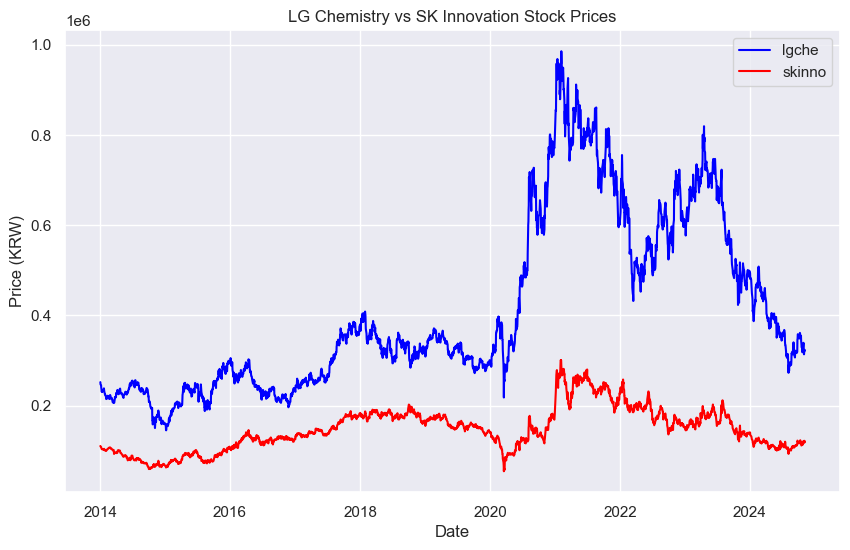

In [7]:
#import yfinance as yf
#import pandas as pd
#import matplotlib.pyplot as plt
from my_imports import *
# LG화학과 SK이노베이션의 주가 데이터를 가져오기
start_date = '2014-01-01'  # 시작 날짜 설정
end_date = '2024-11-06'    # 종료 날짜 설정

lgche = yf.download('051910.KS', start=start_date, end=end_date)['Adj Close']
skinno = yf.download('096770.KS', start=start_date, end=end_date)['Adj Close']

data = pd.concat([lgche, skinno], axis=1)

    # 결측치 제거
data.dropna(inplace=True)
    # 상관관계 계산
correlation = data.corr().iloc[0, 1]
print(lgche)
print(skinno)
    # 상관관계 출력
print(f"LG화학과 SK이노베이션의 주가 상관관계: {correlation:.3f}")

    # 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['051910.KS'], label='lgche', color='blue')
plt.plot(data['096770.KS'], label='skinno', color='red')
plt.title("LG Chemistry vs SK Innovation Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price (KRW)")
plt.legend()
plt.show()




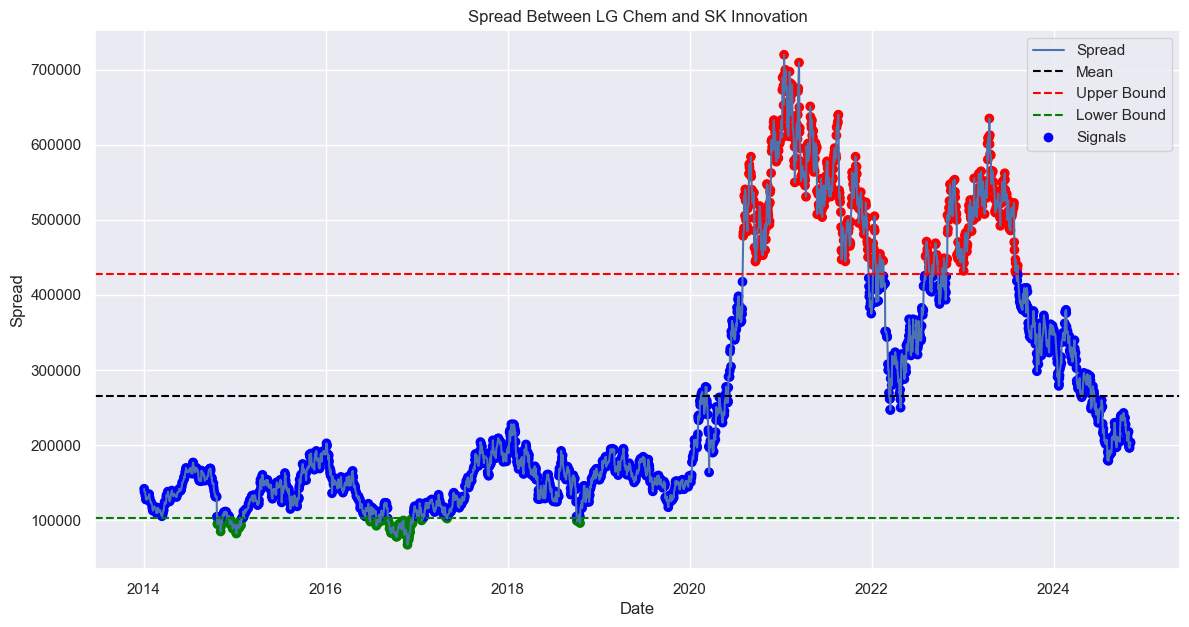

Ticker                            Spread  Sell Signal  Buy Signal
Date                                                             
2014-01-02 00:00:00+00:00  141538.648438        False       False
2014-01-03 00:00:00+00:00  137546.148438        False       False
2014-01-06 00:00:00+00:00  137040.226562        False       False
2014-01-07 00:00:00+00:00  132579.140625        False       False
2014-01-08 00:00:00+00:00  131998.445312        False       False
...                                  ...          ...         ...
2024-10-30 00:00:00+00:00  201700.000000        False       False
2024-10-31 00:00:00+00:00  196100.000000        False       False
2024-11-01 00:00:00+00:00  196200.000000        False       False
2024-11-04 00:00:00+00:00  202400.000000        False       False
2024-11-05 00:00:00+00:00  203400.000000        False       False

[2662 rows x 3 columns]


In [8]:
# 두 종목 스프레드 계산
data['Spread'] = data['051910.KS'] - data['096770.KS']

# 스프레드의 평균과 표준편차
spread_mean = data['Spread'].mean()
spread_std = data['Spread'].std()

# 상한과 하한 설정 (평균 ± 표준편차)
upper_bound = spread_mean + spread_std
lower_bound = spread_mean - spread_std

# 차익거래 신호 생성: 스프레드가 상한을 넘어가면 매도 신호, 하한을 넘어가면 매수 신호
data['Sell Signal'] = data['Spread'] > upper_bound
data['Buy Signal'] = data['Spread'] < lower_bound

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(data['Spread'], label='Spread')
plt.axhline(spread_mean, color='black', linestyle='--', label='Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.scatter(data.index, data['Spread'], c=np.where(data['Sell Signal'], 'red', np.where(data['Buy Signal'], 'green', 'blue')), label='Signals')
plt.legend()
plt.title('Spread Between LG Chem and SK Innovation')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.show()

# 차익거래 신호 출력
print(data[['Spread', 'Sell Signal', 'Buy Signal']])

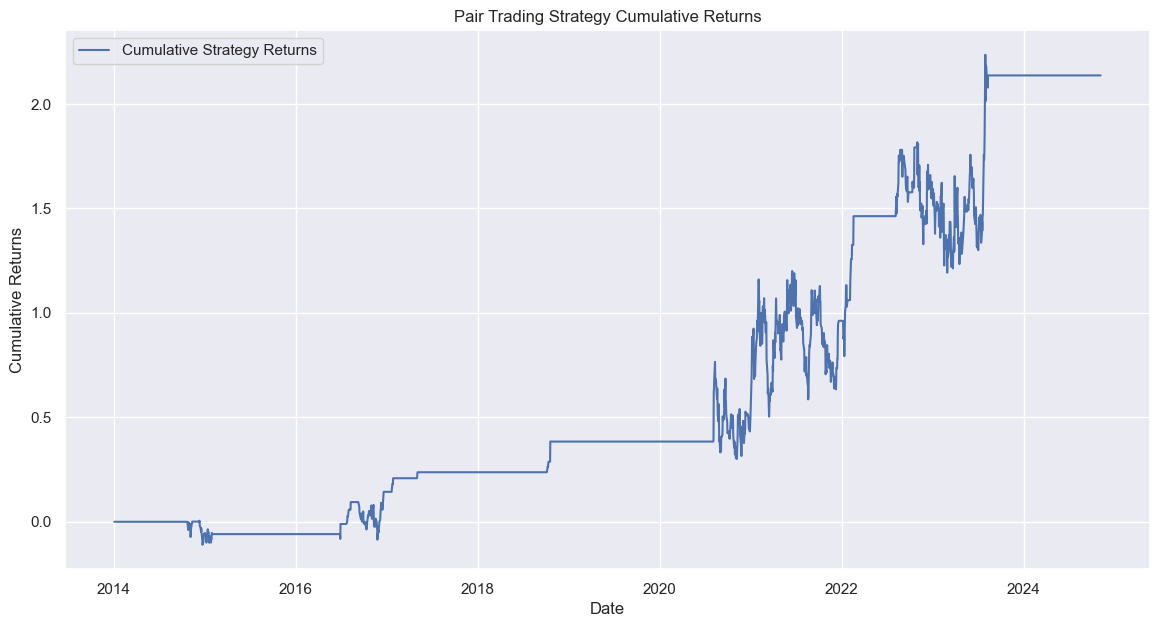

Ticker                     Position  Strategy Returns  \
Date                                                    
2014-01-02 00:00:00+00:00       0.0               NaN   
2014-01-03 00:00:00+00:00       0.0              -0.0   
2014-01-06 00:00:00+00:00       0.0               0.0   
2014-01-07 00:00:00+00:00       0.0              -0.0   
2014-01-08 00:00:00+00:00       0.0               0.0   
...                             ...               ...   
2024-10-30 00:00:00+00:00       0.0               0.0   
2024-10-31 00:00:00+00:00       0.0              -0.0   
2024-11-01 00:00:00+00:00       0.0              -0.0   
2024-11-04 00:00:00+00:00       0.0               0.0   
2024-11-05 00:00:00+00:00       0.0               0.0   

Ticker                     Cumulative Strategy Returns  
Date                                                    
2014-01-02 00:00:00+00:00                          NaN  
2014-01-03 00:00:00+00:00                       0.0000  
2014-01-06 00:00:00+00:00     

In [11]:
# 일일 수익률 계산
data['LG Chem Returns'] = data['051910.KS'].pct_change()
data['SK Innovation Returns'] = data['096770.KS'].pct_change()

# 포지션 설정: Sell Signal에서 매도 (-1), Buy Signal에서 매수 (1)
data['Position'] = 0
data.loc[data['Buy Signal'], 'Position'] = 1  # 매수 포지션
data.loc[data['Sell Signal'], 'Position'] = -1  # 매도 포지션

# 포지션을 하루 늦게 반영 (다음 날 신호를 기반으로 포지션을 취하기 때문)
data['Position'] = data['Position'].shift(1).fillna(0)

# 전략 수익률 계산: LG화학 매수 & SK이노베이션 매도로 구성된 포지션에 따라 수익률을 계산
data['Strategy Returns'] = data['Position'] * (data['LG Chem Returns'] - data['SK Innovation Returns'])

# 누적 수익률 계산
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod() - 1

# 백테스트 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(data['Cumulative Strategy Returns'], label='Cumulative Strategy Returns')
plt.title('Pair Trading Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 백테스트 결과 요약 출력
print(data[['Position', 'Strategy Returns', 'Cumulative Strategy Returns']])
